### Base Models Evaluations with Noise Introduction and Custom parameters

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load and preprocess the dataset
df = pd.read_csv('preprocessed_earthquake_data.csv')
drop_columns = ['Type', 'Magnitude Type', 'Status', 'Source', 'Year', 'Day']
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

In [3]:
# Add synthetic Gaussian noise to features
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [5]:
# Train Logistic Regression with customized parameters
logreg = LogisticRegression(C=0.5, max_iter=200, solver='saga', penalty='l2', random_state=42)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,200
,multi_class,'deprecated'


In [6]:
# Train Decision Tree with customized parameters
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
# Model Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [8]:
# Classification metrics and reports
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [9]:
print_classification_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_classification_metrics(y_test, y_pred_dtree, "Decision Tree")

--- Logistic Regression Metrics ---
Accuracy: 0.9997864160615122
F1-score: 0.9997863225765335
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 0.9995728321230244
F1-score: 0.9995732047795841
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [10]:
# Confusion matrix plotting
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

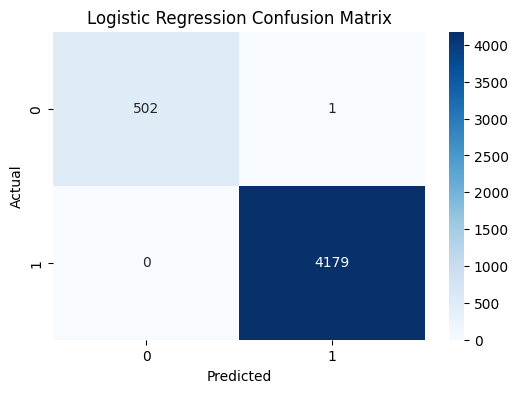

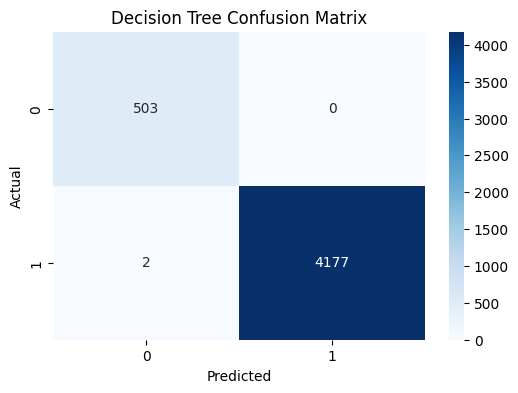

In [11]:
plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_dtree, "Decision Tree Confusion Matrix")

In [12]:
# Regression metrics for analysis for Logistic Regression
print("MAE (Logistic Regression):", mean_absolute_error(y_test, y_pred_logreg))
print("MSE (Logistic Regression):", mean_squared_error(y_test, y_pred_logreg))
print("R² score (Logistic Regression):", r2_score(y_test, y_pred_logreg))

MAE (Logistic Regression): 0.00021358393848782572
MSE (Logistic Regression): 0.00021358393848782572
R² score (Logistic Regression): 0.9977726367328453


In [13]:
# Regression metrics for analysis for Decision Tree
print("MAE (Decision Tree):", mean_absolute_error(y_test, y_pred_dtree))
print("MSE (Decision Tree):", mean_squared_error(y_test, y_pred_dtree))
print("R² score (Decision Tree):", r2_score(y_test, y_pred_dtree))

MAE (Decision Tree): 0.00042716787697565144
MSE (Decision Tree): 0.00042716787697565144
R² score (Decision Tree): 0.9955452734656907


In [14]:
# Error analysis - misclassified samples
misclassified_logreg = X_test[y_test != y_pred_logreg]
misclassified_dtree = X_test[y_test != y_pred_dtree]

In [15]:
print("--- Misclassified Samples (Logistic Regression) ---")
display(misclassified_logreg.head())

print("--- Misclassified Samples (Decision Tree) ---")
display(misclassified_dtree.head())

--- Misclassified Samples (Logistic Regression) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
7003,1.261654,-1.347043,-0.558461,0.599811,-0.100667,1.255942,-0.769362,-1.13786,1.13699,0.005376,...,1.099089,-0.052108,-0.06114,-0.00913,-0.095244,0.025586,-0.061455,-0.126643,0.299399,0.14298


--- Misclassified Samples (Decision Tree) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
22385,2.082445,-1.595168,0.342568,0.781483,-0.062074,-1.536673,0.03787,-1.339148,-0.409961,-0.011711,...,-0.004498,0.113510,-0.001819,-0.020696,-0.122367,0.143132,0.026783,0.039098,-0.084127,-0.135847
22201,1.824243,-1.540831,0.135089,-0.687413,-0.445438,0.733809,-1.20482,-0.711803,-1.269620,-0.178817,...,0.013226,-0.094426,0.115647,0.172244,-0.127858,-0.005240,-0.125959,0.110584,0.056334,0.110095


#### Observation Summary
In this notebook, we performed baseline classification modeling on the earthquake dataset using Logistic Regression and Decision Tree classifiers with customized hyperparameters. Synthetic Gaussian noise was added to the features to simulate real-world variability and improve model robustness.

- Key observations include:

  - Both models achieved extremely high classification performance with accuracy and F1-scores nearing 1.0, indicating excellent predictive capability.

  - Logistic Regression slightly outperformed Decision Tree in both accuracy (0.99979 vs. 0.99957) and F1-score (0.99979 vs. 0.99957), demonstrating a marginally better fit.

  - Confusion matrices showed almost perfect classification with very few misclassifications.

  - Regression metrics (MAE, MSE, R²) aligned with classification results, supporting strong model fits.

  - Error analysis revealed a minimal number of misclassified samples, suggesting models are well-calibrated.

Overall, adding synthetic noise and training these baseline models proved effective for establishing a robust benchmark in earthquake event classification, providing a solid foundation for exploring more advanced models.